This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run the following block of code before running any other cells in the notebook) 

In [1]:
from importMag import *
from MagVector import *
%matplotlib inline

This notebook uses code adapted from 

Fatiando 
- Uieda, L, Oliveira Jr, V C, Ferreira, A, Santos, H B; Caparica Jr, J F (2014), Fatiando a Terra: a Python package for modeling and inversion in geophysics. figshare. doi:10.6084/m9.figshare.1115194

SimPEG
- Cockett, R., S. Kang, L.J. Heagy, A. Pidlisecky, D.W. Oldenburg (2015, in review), SimPEG: An open source framework for simulation and gradient based parameter estimation in geophysical applications. Computers and Geosciences

# How do we define direction of an earth magnetic field?

Earth magnetic field is a vector. To define a vector we need to choose a coordinate system. We use right-handed system: X (Northing), Y (Easting), and Z (Down). Here we consider an earth magnetic field ($\vec{B_0}$), of which intensity is one. To define this unit vector, we use inclinatino and declination:

- Declination: An angle from geographic North (Ng) to Magnetic North (Nm) on N-E plane
- Inclination: An angle from Nm to an Earth magnetic field

<img src="./img/earthfield.png" style="width: 80%; height: 80%"> </img>

# What's data?: total field anomaly

We consider a typical form of magnetic data. To illustrate this we consider an suceptible object embedded in the earth. 
Based upon the earth magnetic field ($\vec{B}_0$), this object will generate anomalous magnetic field ($\vec{B}_A$). We define an unit vector $\hat{B}_0$ for the earth field as 
$$ \hat{B}_0 = \frac{\vec{B}_0}{|\vec{B}_0|}$$ 
We measure both earth and anomalous magnetic field such that

$$ \vec{B} = \vec{B}_0 + \vec{B}_A$$

Total field anomaly, $\triangle \vec{B}$ can be defined as

$$  |\triangle \vec{B}| = |\vec{B}|-|\vec{B}_E| $$ 

If $|\vec{B}|\ll|\vec{B}_E|$, then that is total field anomaly $\triangle \vec{B}$ is the projection of the anomalous field onto the direction of the earth field:

$$ |\triangle \vec{B}| \simeq \vec{B}_A \cdot \hat{B}_0=|\vec{B}_A|cos\theta$$ 

<img src="./img/totalfieldanomaly.png" style="width: 50%; height: 50%"> </img>

# Define a 3D prism

Our model is a rectangular prism. Parameters to define this prism are given below:

- dx: length in Northing (x) direction (meter)
- dy: length in Easting (y) direction (meter)
- dz: length in Depth (z) direction (meter) below the receiver
- depth: top boundary of the prism (meter)
- pinc: inclination of the prism (reference is a unit northing vector; degree)
- pdec: declination of the prism (reference is a unit northing vector; degree)

Green dots show a plane where we measure data. 

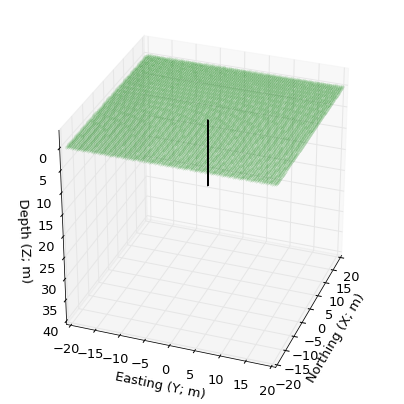

(<fromFatiando.fatiandoGridMesh.Prism at 0x1047befd0>, True)

In [2]:
dx, dy, dz, depth = 0.08, 0.08, 15., 1.
prism=ViewPrismSurvey(dx, dy, dz, depth)
display(prism)

# Magnetic applet

Based on the prism that you made above, below Magnetic applet computes magnetic field at receiver locations, and provide both 2D map (left) and profile line (right). For the prism, there are two parameters that you can alter:
- depth: top boundary of the prism
- sus: susceptibility of the prism

Parameters for the earth field are:
- Einc: inclination of the earth field (degree)
- Edec: declination of the earth field (degree)
- Bigrf: intensity of the earth field (nT)

A profile line can be determined with five parameters:
- x1, y1: northing and easting point for A (start)
- x2, y2: northing and easting point for B (end)
- npts: the number of points along the line

2D interpolated map is ranging from -20 m to 20 m for both Northing and Easting directions. 
- npts2D: The number of points for each direction
- z: height of the receivers
- comp: types of the observed data 

    "tf": total field anomaly,  "bx":x-component, "by":y-component, "bz":z-component

You can simulate remanent magnetization effect with parameters:
- irt: "induced", "remanent", or "total"
- Q: Koenigsberger ratio ($\frac{M_{rem}}{M_{ind}}$)
- rinc: inclination of the remanent magnetization (degree)
- rdec: declination of the remanent magnetization (degree)


In [3]:
display(ViewMagSurvey2DInd(prism))

UnboundLocalError: local variable 'x' referenced before assignment